# MNIST Classification

## Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# Fetch Dataset

In [20]:
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

## Split Into Train and Test Sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale Data Using MinMax

In [22]:
# We know that the image has 28x28 pixels, each with a scale of 0 to 255
# To do MinMax scaling with a range of 0 to 1, we can just divide by 255
X_train = X_train / 255
X_test = X_test / 255

## K Neighbors Classifier

### Hyperparameter Tuning

In [23]:
# Book suggests a grid search on the weights and n neighbors hyperparameters

# Tune on a smaller subset to start evaluating hyperparameters (stratify by targets to ensure that smaller dataset has same proportions)
X_small, _, y_small, _ = train_test_split(X, y, train_size=30000, stratify=y, random_state=42)

knn_tuning = KNeighborsClassifier()

# Hyperparameter tuning grid (tests various values of neighbors and different weighting)
param_grid  = [
    {
        "n_neighbors": [5, 7, 9],
        "weights": ["uniform", "distance"]
    }
]

grid_search = GridSearchCV(knn_tuning, param_grid, cv=3)

grid_search.fit(X_small, y_small)
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

### Train Final KNN

In [24]:
best_params = grid_search.best_params_

# ** unpacks the best_params_ dict, meaning it passed in each key and value as an arg into KNeighbors Classifier
knn = KNeighborsClassifier(**best_params)

# Train on complete dataset
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Save KNN Values to pkl File

In [ ]:
# joblib.dump(knn, "knn_mnist_full.pkl")

['knn_mnist_full.pkl']

### Cross-Validation

In [26]:
cross_val_score(knn, X_train, y_train, cv=3, scoring="accuracy")

array([0.96769701, 0.97091123, 0.96737383])

### Confusion Matrix

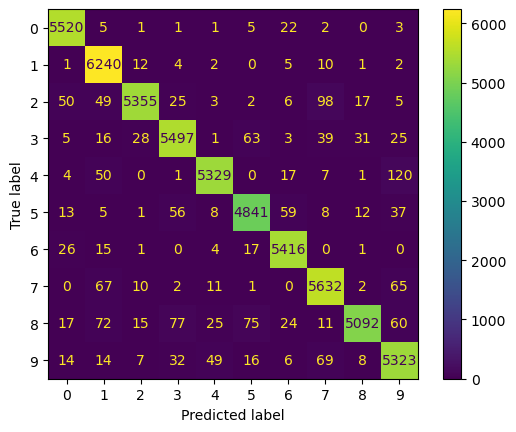

In [27]:
# Get model predictions from cross validation
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

### Precision, Recall, and F1

In [28]:
print(precision_score(y_train, y_train_pred, average="macro"))
print(recall_score(y_train, y_train_pred, average="macro"))

# F1 is harmonic mean of precision and recall
print(f1_score(y_train, y_train_pred, average="macro"))

0.9691349909167096
0.9682280322353318
0.9685065638412528
